In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Cargar los datos
data = pd.read_csv('datos_limpios0.csv')
data = data[data['department'] == 'sweing']
data.drop(columns=['department'], inplace=True)
data.shape

(666, 14)

In [19]:
data.head()
headers = data.columns.tolist()
headers

['date',
 'quarter',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

**Factores:**
- **Date**: Date in MM-DD-YYYY
- **Quarter**: A portion of the month. A month was divided into four quarters
- **Department**: Associated department with the instance
- **Day**: Day of the Week
- **Team**: Associated team number with the instance
- **Targeted productivity**: Targeted productivity set by the Authority for each team for each day.
- **SMV**: Standard Minute Value, it is the allocated time for a task
- **WIP**: Work in progress. Includes the number of unfinished items for products
- **Over time**: Represents the amount of overtime by each team in minutes
- **Incentive**: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- **Idle time**: The amount of time when the production was interrupted due to several reasons
- **Idle men**: The number of workers who were idle due to production interruption
- **No of style change**: Number of changes in the style of a particular product
- **No of workers**: Number of workers in each team

**Variable de respuesta:**
- **Actual productivity**: The actual % of productivity that was delivered by the workers. It ranges from 0-1.



In [20]:
data.head()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/01/2015,Quarter1,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/01/2015,Quarter1,Thursday,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/01/2015,Quarter1,Thursday,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/01/2015,Quarter1,Thursday,6,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/01/2015,Quarter1,Thursday,7,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125


In [21]:
# Convertir la columna 'Date' a tipo datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')


In [22]:
# Extraer día, mes y año de la columna 'Date'
data['Day'] = data['date'].dt.day
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year

# Eliminar la columna 'Date'
data.drop(columns=['date'], inplace=True)

# Mostrar las primeras filas del DataFrame
data.head()

,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Day,Month,Year
0,Quarter1,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,2015
2,Quarter1,Thursday,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
3,Quarter1,Thursday,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
4,Quarter1,Thursday,6,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,2015
5,Quarter1,Thursday,7,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,1,1,2015


In [24]:
# Realizo una copia del DataFrame original
data_encoded = data.copy()

# Codificar las columnas categóricas en la copia
data_encoded['quarter'] = data_encoded['quarter'].astype('category').cat.codes
data_encoded['day'] = data_encoded['day'].astype('category').cat.codes
data_encoded['team'] = data_encoded['team'].astype('category').cat.codes


### Incluir seaborn para Visualización

In [25]:
import seaborn as sns

In [26]:
#sns.pairplot(data_encoded,)

### Matriz de correlación

<Axes: >

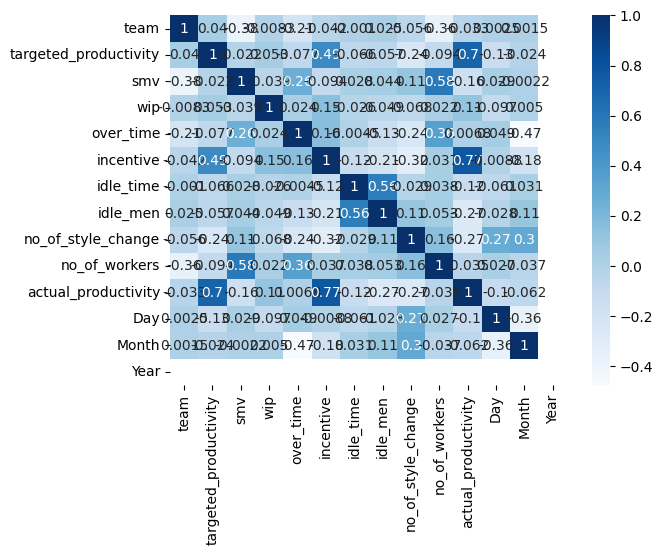

In [27]:
# Excluir columnas no numéricas
numeric_data = data.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
corr = numeric_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

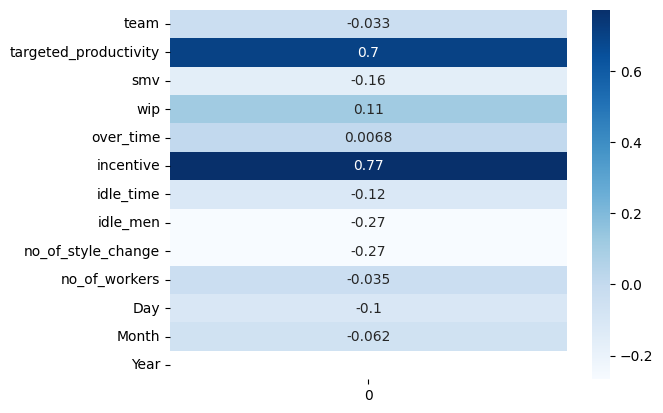

In [28]:
corrw = numeric_data.drop(['actual_productivity'], axis=1).corrwith(data['actual_productivity'])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

## Normalidad

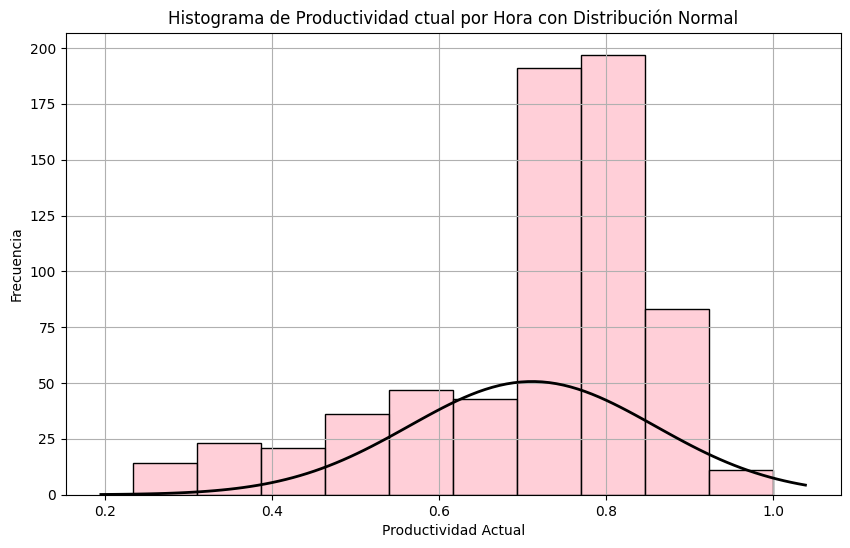

In [29]:
from scipy.stats import norm

# Crear el histograma de la productividad atual
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='actual_productivity', bins=10, kde=False, color='#FFC0CB')

# Calcular la media y desviación estándar de la productividad actual
mean = data['actual_productivity'].mean()
std = data['actual_productivity'].std()

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Productividad Actual')
plt.ylabel('Frecuencia')
plt.title('Histograma de Productividad ctual por Hora con Distribución Normal')
plt.grid(True)
plt.show()

In [30]:
from scipy.stats import kstest, norm

# Seleccionar la variable dependiente
actual_prod = data['actual_productivity']

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(actual_prod, 'norm', args=(actual_prod.mean(), actual_prod.std()))

# Mostrar los resultados
print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("La variable dependiente no sigue una distribución normal (rechazar H0)")
else:
    print("La variable dependiente sigue una distribución normal (no rechazar H0)")

Estadístico de Kolmogorov-Smirnov: 0.19293433646037356
Valor p: 3.443199977339787e-22
La variable dependiente no sigue una distribución normal (rechazar H0)


**Box-Cox transformation**

Estadístico de Kolmogorov-Smirnov: 0.14847724617377134
Valor p: 2.792248111242275e-13
La variable dependiente no sigue una distribución normal (rechazar H0)


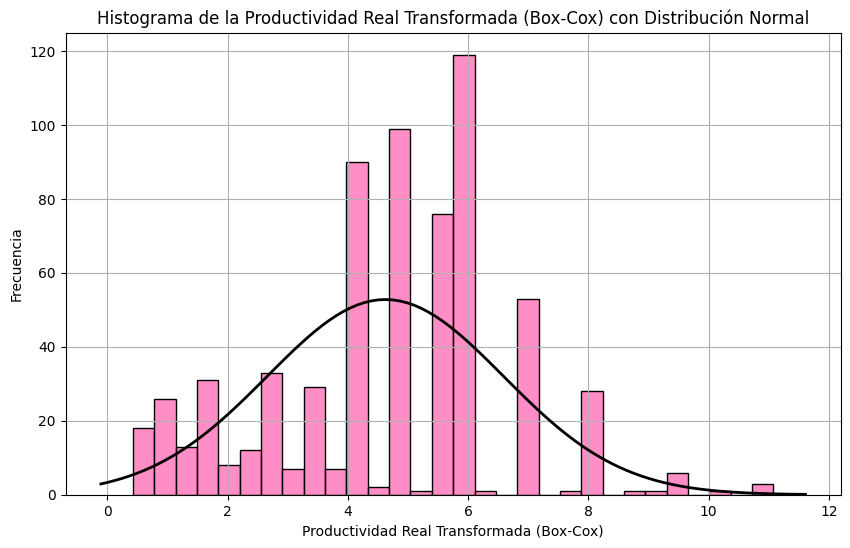

Valor de lambda para la transformación de Box-Cox: 6.099379898320417


In [33]:
from scipy.stats import boxcox, kstest, norm

# Seleccionar la variable dependiente
actual_productivity = data['actual_productivity']

# Aplicar la transformación de Box-Cox
actual_productivity_transformed, lambda_value = boxcox(actual_productivity + 1)  # Añadir 1 para evitar problemas con valores cero

# Añadir la columna transformada al DataFrame
data['actual_productivity_transformed'] = actual_productivity_transformed

# Crear el histograma de la productividad transformada
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='actual_productivity_transformed', bins=30, kde=False, color='#FF69B4')

# Calcular la media y desviación estándar de la productividad transformada
mean_transformed = data['actual_productivity_transformed'].mean()
std_transformed = data['actual_productivity_transformed'].std()

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(actual_productivity_transformed, 'norm', args=(mean_transformed, std_transformed))

# Mostrar los resultados
print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("La variable dependiente no sigue una distribución normal (rechazar H0)")
else:
    print("La variable dependiente sigue una distribución normal (no rechazar H0)")

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_transformed, std_transformed)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Productividad Real Transformada (Box-Cox)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Productividad Real Transformada (Box-Cox) con Distribución Normal')
plt.grid(True)
plt.show()

# Mostrar el valor de lambda
print(f'Valor de lambda para la transformación de Box-Cox: {lambda_value}')

**Transformacion de raiz cuadrada**

Estadístico de Kolmogorov-Smirnov: 0.9364828161552928
Valor p: 0.0
La variable dependiente no sigue una distribución normal (rechazar H0)


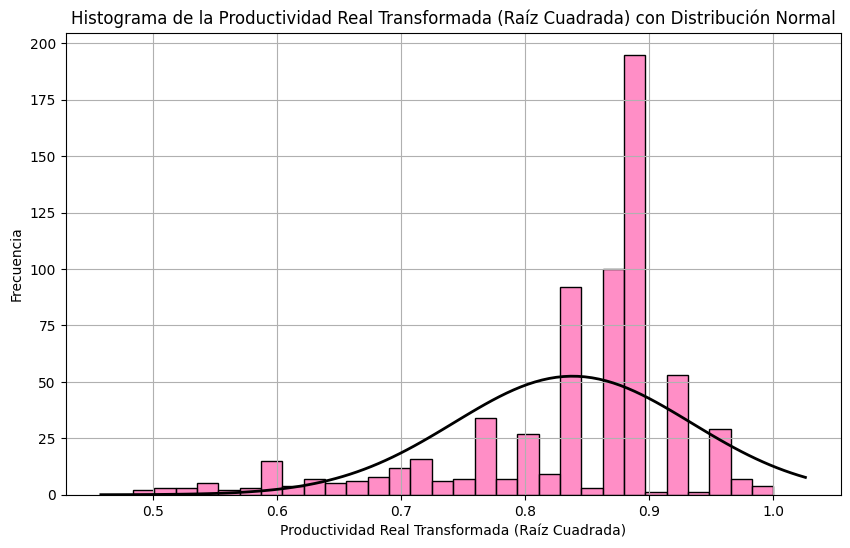

In [34]:
# Seleccionar la variable dependiente
actual_productivity = data['actual_productivity']

# Aplicar la transformación de raíz cuadrada
actual_productivity_transformedSqrt = np.sqrt(actual_productivity)

# Añadir la columna transformada al DataFrame
data['actual_productivity_transformedsqrt'] = actual_productivity_transformedSqrt

# Crear el histograma de la productividad transformada
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='actual_productivity_transformedsqrt', bins=30, kde=False, color='#FF69B4')

# Calcular la media y desviación estándar de la productividad transformada
mean_transformed = data['actual_productivity_transformedsqrt'].mean()
std_transformed = data['actual_productivity_transformedsqrt'].std()

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(actual_productivity_transformed, 'norm', args=(mean_transformed, std_transformed))

# Mostrar los resultados
print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("La variable dependiente no sigue una distribución normal (rechazar H0)")
else:
    print("La variable dependiente sigue una distribución normal (no rechazar H0)")

# Crear un rango de valores para la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_transformed, std_transformed)

# Graficar la línea de la distribución normal
plt.plot(x, p * len(data) * (xmax - xmin) / 30, 'k', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Productividad Real Transformada (Raíz Cuadrada)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Productividad Real Transformada (Raíz Cuadrada) con Distribución Normal')
plt.grid(True)
plt.show()

## Modelo de regresión lineal

$y = \beta_0 + \alpha_1 \times \text{Quarter} + \alpha_2 \times \text{Day} + \alpha_4 \times \text{Team} + \beta_1 \times \text{Targeted Productivity} + \beta_2 \times \text{SMW} + \beta_3 \times \text{WIP} + \beta_4 \times \text{Over time} + \beta_5 \times \text{Incentive} + \beta_6 \times \text{Idle Time} + \beta_7 \times \text{Idle men} + \beta_8 \times \text{No Of Style Change} + \beta_9 \times \text{No Of Workers} + \alpha_5 \times \text{Day} + \alpha_6 \times \text{Month} + \alpha_7 \times \text{Year}$

In [35]:
data_encoded.columns.tolist()

['quarter',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity',
 'Day',
 'Month',
 'Year']

**Variables Explicativas**

In [38]:
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers','Day', 'Month', 'Year']

X = data_encoded[features]
X = pd.get_dummies(X, columns=['day', 'team', 'quarter'], dtype=int, drop_first=True)

X.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Day,...,team_6,team_7,team_8,team_9,team_10,team_11,quarter_1,quarter_2,quarter_3,quarter_4
0,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,1,...,0,1,0,0,0,0,0,0,0,0
2,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,1,...,0,0,0,0,1,0,0,0,0,0
3,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,1,...,0,0,0,0,0,1,0,0,0,0
4,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,1,...,0,0,0,0,0,0,0,0,0,0
5,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,1,...,1,0,0,0,0,0,0,0,0,0


In [39]:
X.shape

(666, 32)

**Variable de respuesta**

In [40]:
Y = data_encoded["actual_productivity"]

Y.head()


0    0.940725
2    0.800570
3    0.800570
4    0.800382
5    0.800125
Name: actual_productivity, dtype: float64

### Modelo con todas las variables

In [41]:
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

In [42]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.767
Method:                  Least Squares   F-statistic:                     57.27
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          2.33e-143
Time:                         16:42:52   Log-Likelihood:                 668.98
No. Observations:                  532   AIC:                            -1274.
Df Residuals:                      500   BIC:                            -1137.
Df Model:                           31                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
targeted_productivit

## Verificacion de problemas en el Modelo Lineal

#### Verificacion de multicolinealidad con estos datos

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Agrega una columna constante al DataFrame si aún no está presente
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                 Variable         VIF
0   targeted_productivity    1.482030
1                     smv    1.993575
2                     wip    1.124584
3               over_time    1.821519
4               incentive    1.864998
5               idle_time    1.540986
6                idle_men    1.621988
7      no_of_style_change    1.809388
8           no_of_workers    5.382727
9                     Day   30.663140
10                  Month    1.943603
11                   Year  287.103492
12                  day_1    1.854600
13                  day_2    1.780407
14                  day_3    1.802404
15                  day_4    1.767671
16                  day_5    1.927713
17                 team_1    1.952262
18                 team_2    2.057241
19                 team_3    2.131602
20                 team_4    2.246148
21                 team_5    4.252595
22                 team_6    2.223159
23                 team_7    2.212633
24                 team_8    2.119278
25          

El modelo presenta un problema de multicolinealidad, por lo que se debe realizar un análisis de componentes principales para reducir la dimensionalidad de los datos.

La multicolinealidad imperfecta ocurre cuando las columnas de la matriz XTX son casi linealmente
dependientes, lo que resulta en un determinante cercano a cero. Esto implica que es posible calcular la
inversa de la matriz, pero los valores resultantes serán muy grandes en valor absoluto. Para abordar este
problema, se propone eliminar las variables que presenten la mayor correlación entre sí. Posteriormente,
se puede recalcular el factor de inflación de la varianza (VIF) en el nuevo modelo sin estas variables para
determinar si se ha resuelto el problema de multicolinealidad imperfecta. En este modelo en especifico al
determinar la matriz de correlación entre las variables se obtuvo el siguiente resultado:

In [44]:
X_reduced = X.drop(columns=['Year', 'Day'])
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X_reduced)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)


                 Variable       VIF
1   targeted_productivity  1.478608
2                     smv  1.991661
3                     wip  1.116454
4               over_time  1.818133
5               incentive  1.864744
6               idle_time  1.536348
7                idle_men  1.621378
8      no_of_style_change  1.801398
9           no_of_workers  5.380779
10                  Month  1.800972
11                  day_1  1.757404
12                  day_2  1.720765
13                  day_3  1.796120
14                  day_4  1.723248
15                  day_5  1.721805
16                 team_1  1.951659
17                 team_2  2.056305
18                 team_3  2.130955
19                 team_4  2.245808
20                 team_5  4.252276
21                 team_6  2.220898
22                 team_7  2.209528
23                 team_8  2.119032
24                 team_9  2.136260
25                team_10  2.508834
26                team_11  4.437847
27              quarter_1  1

<Axes: >

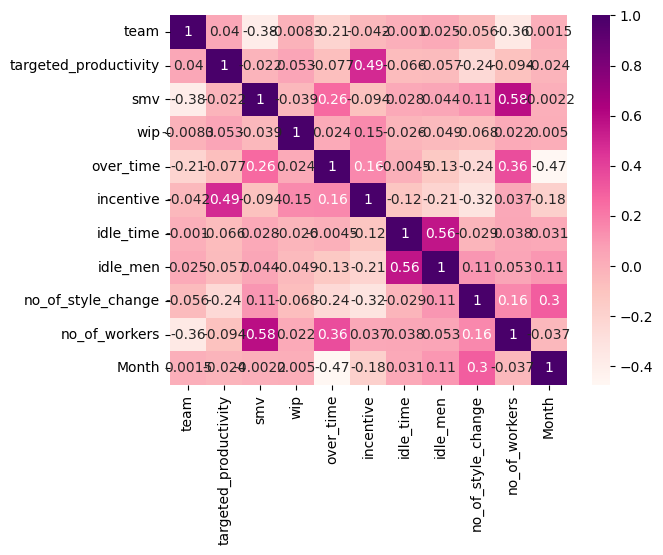

In [45]:
numeric_data = data.select_dtypes(include=[float, int])

numeric_data_without_target = numeric_data.drop(columns=['actual_productivity', 'Day', 'Year', 'actual_productivity_transformed', 'actual_productivity_transformed','actual_productivity_transformedsqrt'])

# Calcular la matriz de correlación
corr = numeric_data_without_target.corr()
sns.heatmap(corr, cmap="RdPu", annot=True)

In [48]:
X_reduced.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Month,...,team_6,team_7,team_8,team_9,team_10,team_11,quarter_1,quarter_2,quarter_3,quarter_4
0,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,1,...,0,1,0,0,0,0,0,0,0,0
2,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,1,...,0,0,0,0,1,0,0,0,0,0
3,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,1,...,0,0,0,0,0,1,0,0,0,0
4,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,1,...,0,0,0,0,0,0,0,0,0,0
5,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,1,...,1,0,0,0,0,0,0,0,0,0


## Homocedasticidad

In [51]:
### Modelo con las variables sin multicolinealidad
# nombres de características
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time',
            'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'Month']

X_Reduced = data_encoded[features]
X_Reduced = pd.get_dummies(X_Reduced, columns=['day', 'team', 'quarter', 'no_of_style_change', 'Month'], dtype=int, drop_first=True)

X_Reduced.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,day_1,day_2,...,team_10,team_11,quarter_1,quarter_2,quarter_3,quarter_4,no_of_style_change_1,no_of_style_change_2,Month_2,Month_3
0,0.8,26.16,1108.0,7080,98,0.0,0,59.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.8,11.41,968.0,3660,50,0.0,0,30.5,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.8,11.41,968.0,3660,50,0.0,0,30.5,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.8,25.90,1170.0,1920,50,0.0,0,56.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.8,25.90,984.0,6720,38,0.0,0,56.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_trainSM, X_test, y_train, y_test = train_test_split(X_Reduced, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainSM = sm.add_constant(X_trainSM)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelSM = sm.OLS(y_train, X_trainSM).fit()

# resumen de resultados
print(modelSM.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.766
Method:                  Least Squares   F-statistic:                     55.42
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          1.48e-142
Time:                         16:49:33   Log-Likelihood:                 669.18
No. Observations:                  532   AIC:                            -1272.
Df Residuals:                      499   BIC:                            -1131.
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [64]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(modelSM.resid, modelSM.model.exog)

# Extraer los resultados del test
bp_test_stat = bp_test[0]
bp_test_pvalue = bp_test[1]
bp_test_fvalue = bp_test[2]
bp_test_f_pvalue = bp_test[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic: {bp_test_stat}")
print(f"Breusch-Pagan Test p-value: {bp_test_pvalue}")
print(f"Breusch-Pagan Test F-Statistic: {bp_test_fvalue}")
print(f"Breusch-Pagan Test F p-value: {bp_test_f_pvalue}")

Breusch-Pagan Test Statistic: 130.7375902024547
Breusch-Pagan Test p-value: 6.847317071556738e-14
Breusch-Pagan Test F-Statistic: 5.080688465805051
Breusch-Pagan Test F p-value: 2.683703282719835e-16


##### Transformada Logaritmica

In [57]:
# Aplicar la transformación logarítmica a la variable dependiente
y_log = np.log(Y + 1)  # Se suma 1 para evitar log(0)

X_trainHomo, X_test, y_trainHomo, y_test = train_test_split(X_Reduced, y_log, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainHomo = sm.add_constant(X_trainHomo)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelHomo = sm.OLS(y_trainHomo, X_trainHomo).fit()

# Realizar el test de Breusch-Pagan
bp_test_log = het_breuschpagan(modelHomo.resid, modelHomo.model.exog)

# Extraer los resultados del test
bp_test_stat_log = bp_test_log[0]
bp_test_pvalue_log = bp_test_log[1]
bp_test_fvalue_log = bp_test_log[2]
bp_test_f_pvalue_log = bp_test_log[3]

# Imprimir los resultados
print(f"Breusch-Pagan Test Statistic (log): {bp_test_stat_log}")
print(f"Breusch-Pagan Test p-value (log): {bp_test_pvalue_log}")
print(f"Breusch-Pagan Test F-Statistic (log): {bp_test_fvalue_log}")
print(f"Breusch-Pagan Test F p-value (log): {bp_test_f_pvalue_log}")


Breusch-Pagan Test Statistic (log): 124.30852135908158
Breusch-Pagan Test p-value (log): 8.118771348932853e-13
Breusch-Pagan Test F-Statistic (log): 4.754664020462616
Breusch-Pagan Test F p-value (log): 6.7464988042173495e-15


##### Modelos de Regresion Ponderada

In [59]:
# Estrategia 2: Modelos de Regresión Ponderada

# Regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
weights = 1 / modelSM.resid**2
model_weighted = sm.WLS(y_train, X_trainSM, weights=weights).fit()
print(model_weighted.summary())

# Realizar el test de Breusch-Pagan en el modelo ponderado
bp_test_weighted = het_breuschpagan(model_weighted.resid, model_weighted.model.exog)

# Extraer los resultados del test
bp_test_stat_weighted = bp_test_weighted[0]
bp_test_pvalue_weighted = bp_test_weighted[1]
bp_test_fvalue_weighted = bp_test_weighted[2]
bp_test_f_pvalue_weighted = bp_test_weighted[3]

# Imprimir los resultados del test
print(f"Breusch-Pagan Test Statistic (weighted): {bp_test_stat_weighted}")
print(f"Breusch-Pagan Test p-value (weighted): {bp_test_pvalue_weighted}")
print(f"Breusch-Pagan Test F-Statistic (weighted): {bp_test_fvalue_weighted}")
print(f"Breusch-Pagan Test F p-value (weighted): {bp_test_f_pvalue_weighted}")

                             WLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       1.000
Model:                             WLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 6.511e+04
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                         16:49:53   Log-Likelihood:                 1280.0
No. Observations:                  532   AIC:                            -2494.
Df Residuals:                      499   BIC:                            -2353.
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

##### Modelo OLS con errores estandar

In [60]:
import statsmodels.api as sm

# Ajustar el modelo OLS con errores estándar robustos
model_robust = sm.OLS(y_train, X_trainSM).fit(cov_type='HC3')

# Imprimir el resumen del modelo
print(model_robust.summary())

# Realizar el test de Breusch-Pagan en el modelo robusto
bp_test_robust = het_breuschpagan(model_robust.resid, model_robust.model.exog)

# Extraer los resultados del test
bp_test_stat_robust = bp_test_robust[0]
bp_test_pvalue_robust = bp_test_robust[1]
bp_test_fvalue_robust = bp_test_robust[2]
bp_test_f_pvalue_robust = bp_test_robust[3]

# Imprimir los resultados del test
print(f"Breusch-Pagan Test Statistic (robust): {bp_test_stat_robust}")
print(f"Breusch-Pagan Test p-value (robust): {bp_test_pvalue_robust}")
print(f"Breusch-Pagan Test F-Statistic (robust): {bp_test_fvalue_robust}")
print(f"Breusch-Pagan Test F p-value (robust): {bp_test_f_pvalue_robust}")

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.766
Method:                  Least Squares   F-statistic:                     44.45
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          1.02e-124
Time:                         16:50:00   Log-Likelihood:                 669.18
No. Observations:                  532   AIC:                            -1272.
Df Residuals:                      499   BIC:                            -1131.
Df Model:                           32                                         
Covariance Type:                   HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

## Verificacion de Especificación con estos datos

In [61]:
### Modelo con las variables significativas
# nombres de características
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time',
            'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'Month']

X_Reduced = data_encoded[features]
X_Reduced = pd.get_dummies(X_Reduced, columns=['day', 'team', 'quarter', 'no_of_style_change', 'Month'], dtype=int, drop_first=True)

X_trainES, X_test, y_trainES, y_test = train_test_split(X_Reduced, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainES = sm.add_constant(X_trainES)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelES = sm.OLS(y_trainES, X_trainES).fit()

# resumen de resultados
print(modelES.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.766
Method:                  Least Squares   F-statistic:                     55.42
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          1.48e-142
Time:                         16:50:13   Log-Likelihood:                 669.18
No. Observations:                  532   AIC:                            -1272.
Df Residuals:                      499   BIC:                            -1131.
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [63]:
from statsmodels.stats.diagnostic import linear_reset


reset_test = linear_reset(modelES, power=2, use_f=True)

# Imprimir los resultados del test
print(reset_test)

<F test: F=3.7969489343523066, p=0.05190730235531058, df_denom=498, df_num=1>


Ya que el p-value es mayor a 0,05 no se rechaza la hipótesis nula, por lo cual el modelo NO presenta problemas de Especificacion.

## Verificacion de Autocorrelacion

In [66]:
### Modelo con las variables significativas
# nombres de características
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time',
            'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'Month']

X_Reduced = data_encoded[features]
X_Reduced = pd.get_dummies(X_Reduced, columns=['day', 'team', 'quarter', 'no_of_style_change', 'Month'], dtype=int, drop_first=True)

X_trainAUT, X_test, y_trainAUT, y_test = train_test_split(X_Reduced, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_trainAUT = sm.add_constant(X_trainAUT)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
modelES = sm.OLS(y_trainAUT, X_trainAUT).fit()

# resumen de resultados
print(modelES.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.766
Method:                  Least Squares   F-statistic:                     55.42
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          1.48e-142
Time:                         16:51:57   Log-Likelihood:                 669.18
No. Observations:                  532   AIC:                            -1272.
Df Residuals:                      499   BIC:                            -1131.
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

El estadistico de Durbin-Watson esta cercano a dos (2) (1.985), por lo que no se tiene problemas de autocorrelación.

## Modelo Sin Multicolinealidad y con las variables significativas

In [69]:
# Nombres de características que no causan multicolinealidad
features = ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time',
            'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'Month']

# Seleccionar las variables significativas
X_AfterTest = data_encoded[features]

# Convertir variables categóricas a variables dummy
X_AfterTest= pd.get_dummies(X_AfterTest, columns=['day', 'team', 'quarter', 'no_of_style_change', 'Month'], dtype=int, drop_first=True)


In [70]:
y = data['actual_productivity']

In [71]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_AfterTest, y, random_state=1, test_size=0.2)

# Agregar constante explícitamente
X_trainR = sm.add_constant(X_trainR)

In [72]:
# Ajustar el modelo inicial
modelCompleto = sm.OLS(y_trainR, X_trainR).fit()

# Imprimir el resumen del modelo inicial
print(modelCompleto.summary())


                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.780
Model:                             OLS   Adj. R-squared:                  0.766
Method:                  Least Squares   F-statistic:                     55.42
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          1.48e-142
Time:                         16:54:55   Log-Likelihood:                 669.18
No. Observations:                  532   AIC:                            -1272.
Df Residuals:                      499   BIC:                            -1131.
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [73]:
# Identificar variables no significativas (p > 0.05)
variables_no_significativas = modelCompleto.pvalues[modelCompleto.pvalues > 0.05].index.tolist()
variables_no_significativas

['wip',
 'over_time',
 'idle_time',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'team_1',
 'team_2',
 'team_3',
 'team_4',
 'team_5',
 'team_7',
 'team_8',
 'team_9',
 'team_11',
 'quarter_1',
 'quarter_2',
 'quarter_3',
 'quarter_4',
 'no_of_style_change_1',
 'no_of_style_change_2',
 'Month_2',
 'Month_3']

In [74]:
# Eliminar variables no significativas
X_Final = X_AfterTest.drop(columns = variables_no_significativas)
X_train_reduced = X_trainR.drop(columns = variables_no_significativas)
X_test_reduced = X_testR.drop(columns = variables_no_significativas)

# Modelo final regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model_MasReducido = sm.OLS(y_trainR, X_train_reduced).fit()

# Imprimir el resumen del modelo final
print(model_MasReducido.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.768
Model:                             OLS   Adj. R-squared:                  0.765
Method:                  Least Squares   F-statistic:                     248.2
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          7.29e-162
Time:                         16:55:08   Log-Likelihood:                 654.89
No. Observations:                  532   AIC:                            -1294.
Df Residuals:                      524   BIC:                            -1260.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [75]:
# Identificar variables no significativas (p > 0.05)
variables_no_significativas2 = model_MasReducido.pvalues[model_MasReducido.pvalues > 0.05].index.tolist()
variables_no_significativas2

['team_6']

In [76]:
# Eliminar variables no significativas
X_FinalMinimo = X_Final.drop(columns = variables_no_significativas2)
X_train_minimal = X_train_reduced.drop(columns = variables_no_significativas2)
X_test_minimal = X_test_reduced.drop(columns = variables_no_significativas2)

# Modelo final regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model_Final = sm.OLS(y_trainR, X_train_minimal).fit()

# Imprimir el resumen del modelo final
print(model_Final.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.767
Model:                             OLS   Adj. R-squared:                  0.764
Method:                  Least Squares   F-statistic:                     288.1
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          1.72e-162
Time:                         16:55:20   Log-Likelihood:                 653.43
No. Observations:                  532   AIC:                            -1293.
Df Residuals:                      525   BIC:                            -1263.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [77]:
variables_no_significativas3 = model_Final.pvalues[model_MasReducido.pvalues > 0.05].index.tolist()
variables_no_significativas3

[]

## Resumen Variables de Interes

In [78]:
coeficients = model_Final.params
print(coeficients)

const                    0.137048
targeted_productivity    0.630045
smv                     -0.004305
incentive                0.003007
idle_men                -0.004586
no_of_workers            0.001932
team_10                 -0.050492
dtype: float64


### R cuadrado del modelo

In [79]:
print(model_Final.rsquared, model_Final.rsquared_adj)

0.7670179545726268 0.7643553026248854


## Ahora usando usando SKLearn

In [80]:
from sklearn.model_selection import train_test_split

X_trainSK, X_testSK, y_trainSK, y_testSK = train_test_split(X_AfterTest, y, random_state=1,test_size=0.2)

In [81]:
# tamaños 
print(X_trainSK.shape)
print(y_trainSK.shape)
print(X_testSK.shape)
print(y_testSK.shape)

(532, 32)
(532,)
(134, 32)
(134,)


In [82]:
print(X_AfterTest.head())
print(X_trainSK.head())

   targeted_productivity    smv     wip  over_time  incentive  idle_time  \
0                    0.8  26.16  1108.0       7080         98        0.0   
2                    0.8  11.41   968.0       3660         50        0.0   
3                    0.8  11.41   968.0       3660         50        0.0   
4                    0.8  25.90  1170.0       1920         50        0.0   
5                    0.8  25.90   984.0       6720         38        0.0   

   idle_men  no_of_workers  day_1  day_2  ...  team_10  team_11  quarter_1  \
0         0           59.0      0      0  ...        0        0          0   
2         0           30.5      0      0  ...        1        0          0   
3         0           30.5      0      0  ...        0        1          0   
4         0           56.0      0      0  ...        0        0          0   
5         0           56.0      0      0  ...        0        0          0   

   quarter_2  quarter_3  quarter_4  no_of_style_change_1  \
0          0  

In [83]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_trainSK, y_trainSK)

LinearRegression()

In [84]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

0.13097799636548357
[ 6.06215011e-01 -4.56948119e-03 -1.02553093e-06 -2.11399700e-06
  3.27186328e-03  1.23411893e-04 -5.38048154e-03  2.43026203e-03
 -1.42073871e-03 -9.82669754e-03 -6.42537849e-03 -2.45213256e-03
 -1.45651250e-02  1.62289600e-02  5.43678727e-03  2.20754995e-02
  1.37776308e-02  3.19152370e-02  3.36781997e-02  1.85924956e-02
  8.31496221e-03 -7.43586433e-03 -4.55726558e-02  1.07124694e-02
 -4.99378992e-03 -8.43819841e-03 -1.46101258e-02 -1.96078878e-02
  7.96021657e-03  2.53016296e-02  3.93223831e-03  1.52010774e-02]


In [85]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('quarter', 0.6062150106603329),
 ('day', -0.004569481188965115),
 ('team', -1.025530927959821e-06),
 ('targeted_productivity', -2.1139970024482925e-06),
 ('smv', 0.003271863277039839),
 ('wip', 0.00012341189343271155),
 ('over_time', -0.005380481537204767),
 ('incentive', 0.0024302620296709973),
 ('idle_time', -0.0014207387138997502),
 ('idle_men', -0.009826697540530486),
 ('no_of_style_change', -0.006425378494500717),
 ('no_of_workers', -0.0024521325569333337),
 ('Month', -0.01456512496962898)]

### Predicciones usando los datos de prueba

In [87]:
y_predSK = linreg.predict(X_testSK)

In [88]:
from sklearn import metrics

# mean absolute error
MAE = metrics.mean_absolute_error(y_testSK, y_predSK)

# mean squared error
MSE = metrics.mean_squared_error(y_testSK, y_predSK)

# root mean squared error
RMSE = np.sqrt(MSE)

In [89]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.042776595117323596
MSE:  0.004413434659103597
RMSE:  0.06643368617729711


### Validacion cruzada

In [94]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X_AfterTest, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[0.00331219 0.00362182 0.64656034 0.01011147 0.00431603]


In [95]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[0.05755166 0.06018155 0.80408976 0.10055582 0.06569654]


In [96]:
# MSE y RMSE promedio a través de todos los grupos
print("MSE Promedio", mse_scores.mean())
print("RMSE Promedio", rmse_scores.mean())

MSE Promedio 0.13358437256610783
RMSE Promedio 0.2176150633323822


## Determinar puntos de alta influencia con distancias de Cook y umbral de $4/n$

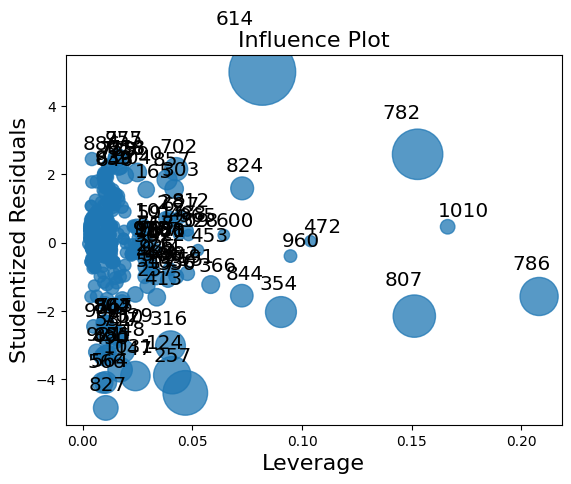

In [98]:
fig = sm.graphics.influence_plot(model_Final, criterion="cooks")

In [100]:
# disntacia de Cook
model_cooksd = model_Final.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_trainR.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_trainR.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.007518796992481203
Index([ 564,  651,  764,  758,  717,  725,  759,  790,  257,  921,  413,  354,
        303,  748,  977,  862, 1031,  547,  750,  702,  204,  827,  531,  165,
        765,  678,  147,  755,  366,  885,  614,  297, 1029,  490,  857,  782,
        124,  786,  566,  824,  844,  807,  316],
      dtype='int64') 
 [0.024625   0.01675825 0.00808661 0.0123673  0.01665798 0.00880868
 0.00878211 0.01528708 0.13132145 0.00913118 0.01277766 0.05849764
 0.01535535 0.02670886 0.01391577 0.00777575 0.03347851 0.00869675
 0.01750236 0.02912659 0.01080373 0.03403976 0.01201642 0.01021835
 0.00839651 0.01152243 0.05225939 0.0140539  0.01341549 0.01606877
 0.30435574 0.00798984 0.01590173 0.01496079 0.01919561 0.17018192
 0.08938901 0.09350494 0.02128499 0.02812354 0.02698917 0.11739197
 0.0535954 ]


In [101]:
X_trainR[out_d]

,const,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,day_1,...,team_10,team_11,quarter_1,quarter_2,quarter_3,quarter_4,no_of_style_change_1,no_of_style_change_2,Month_2,Month_3
564,1.0,0.70,24.26,2698.0,6720,0,0.0,0,56.0,0,...,0,0,0,0,0,0,0,0,1,0
651,1.0,0.70,24.26,154.0,6840,0,0.0,0,57.0,0,...,0,0,1,0,0,0,0,0,1,0
764,1.0,0.70,11.41,680.0,2160,30,0.0,0,54.0,0,...,1,0,0,1,0,0,0,1,1,0
758,1.0,0.75,18.79,895.0,3960,0,0.0,0,33.0,0,...,0,0,0,1,0,0,0,0,1,0
717,1.0,0.80,22.52,10.0,6000,0,0.0,0,50.0,0,...,0,0,1,0,0,0,0,0,1,0
725,1.0,0.75,30.10,481.0,7140,0,0.0,0,59.0,1,...,0,0,1,0,0,0,1,0,1,0
759,1.0,0.75,30.10,912.0,7020,0,0.0,0,58.0,0,...,0,0,0,1,0,0,1,0,1,0
790,1.0,0.70,11.41,685.0,3360,30,0.0,0,56.0,0,...,1,0,0,1,0,0,0,1,1,0
257,1.0,0.80,51.02,1086.0,4260,27,0.0,0,57.0,0,...,0,0,1,0,0,0,0,0,0,0
921,1.0,0.80,30.10,437.0,7080,32,0.0,0,59.0,0,...,0,0,0,0,1,0,0,1,1,0


### Modelo sin la observación 614

In [102]:
# Eliminar la instancia 614
X_train_dropx = X_train_minimal.drop(index = 614)
Y_train_dropy = y_trainR.drop(index = 614)

# agregar constante explíticamente
new_model = sm.OLS(Y_train_dropy, X_train_dropx).fit()

print(new_model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.777
Model:                             OLS   Adj. R-squared:                  0.774
Method:                  Least Squares   F-statistic:                     304.2
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          4.16e-167
Time:                         17:02:57   Log-Likelihood:                 664.08
No. Observations:                  531   AIC:                            -1314.
Df Residuals:                      524   BIC:                            -1284.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [108]:
variables_no_significativas_SinObs = new_model.pvalues[new_model.pvalues > 0.05].index.tolist()
variables_no_significativas_SinObs

[]

In [104]:
# Eliminar variables no significativas
X_FinalSMS = X_FinalMinimo.drop(columns = variables_no_significativas_SinObs)
X_train_SMS = X_train_minimal.drop(columns = variables_no_significativas_SinObs)
X_test_SMS = X_test_minimal.drop(columns = variables_no_significativas_SinObs)

# Modelo final regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS)
model_FinalSMS = sm.OLS(y_trainR, X_train_SMS).fit()

# Imprimir el resumen del modelo final
print(model_FinalSMS.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.767
Model:                             OLS   Adj. R-squared:                  0.764
Method:                  Least Squares   F-statistic:                     288.1
Date:                 Tue, 15 Oct 2024   Prob (F-statistic):          1.72e-162
Time:                         17:03:03   Log-Likelihood:                 653.43
No. Observations:                  532   AIC:                            -1293.
Df Residuals:                      525   BIC:                            -1263.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

### Resumen variables de interes sin la instancia 614

In [105]:
# Suponiendo que coeficients y coeficientesRed ya están definidos
coeficientesRedSMS = model_FinalSMS.params

# Crear un DataFrame con los coeficientes
df = pd.DataFrame({
    'Coeficientes Modelo Reducido': coeficientesRedSMS
})

# Imprimir la tabla
print(df)

                       Coeficientes Modelo Reducido
const                                      0.137048
targeted_productivity                      0.630045
smv                                       -0.004305
incentive                                  0.003007
idle_men                                  -0.004586
no_of_workers                              0.001932
team_10                                   -0.050492


In [106]:
print(model_FinalSMS.rsquared, model_FinalSMS.rsquared_adj)

0.7670179545726268 0.7643553026248854


In [109]:
print("\nComparación de R^2 y R^2 ajustado:")
print(f"R^2 con la instancia 614: {model_Final.rsquared}")
print(f"R^2 ajustado con la instancia 614: {model_Final.rsquared_adj}")
print(f"R^2 sin la instancia 614: {model_FinalSMS.rsquared}")
print(f"R^2 ajustado sin la instancia 614: {model_FinalSMS.rsquared_adj}")


Comparación de R^2 y R^2 ajustado:
R^2 con la instancia 614: 0.7670179545726268
R^2 ajustado con la instancia 614: 0.7643553026248854
R^2 sin la instancia 614: 0.7670179545726268
R^2 ajustado sin la instancia 614: 0.7643553026248854
